# MNIST Dataset, Genetic Algorithms and Neural Networks

What is the MNIST dataset? Simply put, it is 70000 black and white images of handwritten digits.

Where is it available?

To begin, let's import the MNIST dataset.

For this notebook, we'll use scikit-learn and sklearn-deap for our computations, and plotly, seaborn and matplotlib for visualizations.

In [3]:
from sklearn.datasets import fetch_mldata
import tempfile
from six.moves import urllib
import pickle, os

if os.path.exists('mnist.p') == 0 or os.stat('mnist.p').st_size == 0:
    test_data_home = tempfile.mkdtemp()
    try:
        mnist = fetch_mldata('MNIST original',data_home=test_data_home)
    except:
        from scipy.io import loadmat
        mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
        mnist_path = "./mnist-original.mat"
        response = urllib.request.urlopen(mnist_alternative_url)
        with open(mnist_path, "wb") as f:
            content = response.read()
            f.write(content)
        mnist_raw = loadmat(mnist_path)
        mnist = {
            "data": mnist_raw["data"].T,
            "target": mnist_raw["label"][0],
            "COL_NAMES": ["label", "data"],
            "DESCR": "mldata.org dataset: mnist-original",
        }
    pickle.dump(mnist,open('mnist.p','wb'),2)
else:
    mnist = pickle.load(open('mnist.p','rb'),2)

Now that we've imported the data, let's explore what it looks like.

In [6]:
print(dict(zip(['n_samples/images','n_features/pixels'],mnist.data.shape)))

{'n_samples/images': 70000, 'n_features/pixels': 784}


There are 70000 images contained in the dataset, each with 784 pixels, containing intensity values from 1 to 255. The original images are actually 28 pixels x 28 px square images, so let's reshape one of these images/samples into 28px by 28px and plot a heatmap of this:

In [19]:
import seaborn as sns, matplotlib.pyplot as plt, numpy as np, pandas as pd

(28, 28)


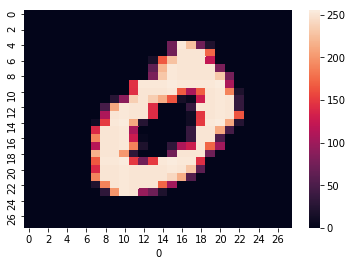

In [20]:
# image 3, a 1x728 dimensional vector of intensity values
image_heatmap_data = mnist.data[3,:].reshape((28,28))
print(image_heatmap_data.shape)

plt.figure()
sns.heatmap(image_heatmap_data)
plt.xlabel(str(int(mnist.target[3])))
plt.show()

Now let's'plot the first 49 digits:

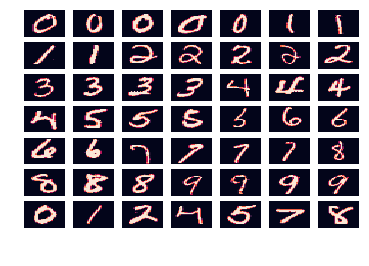

In [29]:
idxs = np.linspace(0,mnist.data.shape[0],50).astype(int)
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.axis('off')
    sns.heatmap(mnist.data[idxs[i],:].reshape((28,28)),cbar=False)
    plt.xlabel(str(int(mnist.target[idxs[i]])))
    
plt.show()

There you go, the MNIST dataset. 70000 images that were originally 28px by 28px images that were turned into 728 px vectors. The images were flattened, and so we have a 70000 by 728 sample by feature matrix, and we can access a digit by loading a particular row of the matrix.

So let's do some machine learning. Let's train a neural network to recognize handwritten digits. First, randomize all of our digits.

In [31]:
shuffled = np.arange(mnist.data.shape[0])
np.random.shuffle(shuffled)
data = mnist.data[shuffled,:]
labels = mnist.target[shuffled]

Then, split them into a training set and testing set. We will train our neural network to recognize these digits, and then test the accuracy on our test set. Consult these videos and text for some explanations:
* https://www.youtube.com/watch?v=aircAruvnKk
* https://www.youtube.com/watch?v=rEDzUT3ymw4
* http://neuralnetworksanddeeplearning.com/chap1.html
* http://natureofcode.com/book/chapter-10-neural-networks/

For this example we will use a multilayer perceptron (MLP):

In [ ]:
from sklearn.model_selection import train_test_split